In [ ]:
# https://www.kaggle.com/datasets/contactprad/bike-share-daily-data

In [ ]:
# https://www.linkedin.com/in/thevedprakash/
# thevedprakash.in@gmail.com
# vedprakash@topmentor.live
# subject: batch-77 + <your name> : 

## Load the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## Read the data

In [ ]:
## Load the data from your file or data source.

In [5]:
df = pd.read_csv("bike_share_data/bike_sharing_daily.csv",na_values=['N/A', 'NIL'])

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week 0-monday , 1-tuesday, 2-wednesday, 3-thursday, 4-friday, 5-Saturday ,6-Sunday 
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [ ]:
## Show first 5 rows

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
## Show last 5 rows

In [6]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
## Show the info for data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
## Check shape of data

In [14]:
df.shape , len(df)

((731, 16), 731)

In [ ]:
## Show the columns

In [12]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
column_list = list(df.columns)
column_list

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [ ]:
## Show the description summary for numerical and categorical values.

In [15]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
# psudeo numerical columns
psudeo_numerical_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

# Exploratory Data Analysis

In [26]:
df['actual_temp'] = df['temp'] *41

## Do Numerical Analysis of Columns

In [ ]:
#  Numerical column analysis 

#  Maximum and mimimum value mean, meadian or std deviation or variance

#  You can learn about their distribution.
# - Histogram.
#  While a histogram is made up of bars that touch each other,it shows counts of values in each range.

# - Distribution plot. 
#  While a density plot shows the proportion of values in each range, a density plot is a smooth curve 
# that shows the distribution of the data in a more continuous way

# Asymmetry 
# Skewness is a statistical measure of the asymmetry of a probability distribution. 
# It characterizes the extent to which the distribution of a set of values deviates from a normal distribution.
# If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
# If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
# If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

# Quantile Analysis
# A quantile defines a particular part of a data set, 
# i.e. a quantile determines how many values in a distribution are above or below a certain limit.

# Analysis of extreme value
# - Box Plot
# - Violin plot

### Analysis of temp column

In [27]:
df["actual_temp"].min()

2.4243464

In [28]:
df["actual_temp"].max()

35.328347

In [29]:
df["actual_temp"].mean()

20.31077632886457

In [30]:
df["actual_temp"].median()

20.431653

In [31]:
df["actual_temp"].std()

7.505090840571039

In [32]:
df["actual_temp"].var()

56.3263885252233

In [33]:
df["actual_temp"].skew()

-0.05452096476040728

#### What is the range where most of the temperature values are lying?

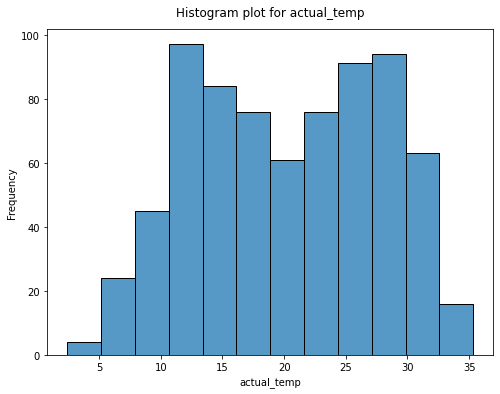

In [34]:
plt.figure(figsize=(8,6)) # (8,6) --("width","height")
# Histogram plot
sns.histplot(df["actual_temp"]) # sns.histplot(df["Age"],kde=True)

plt.title("Histogram plot for actual_temp",y=1.02)
plt.xlabel("actual_temp")
plt.ylabel("Frequency")
plt.show()

<Figure size 576x432 with 0 Axes>

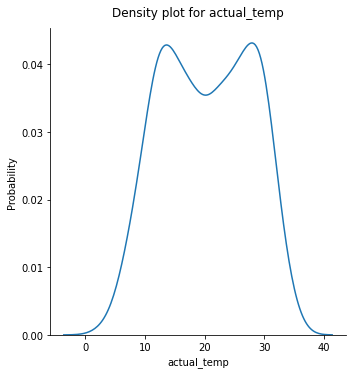

In [36]:
plt.figure(figsize=(8,6))
# Distribution plot
sns.displot(df["actual_temp"],kind="kde") # or sns.kdeplot(df["Age"])
# kde stands for kernel density estimation

plt.title("Density plot for actual_temp",y=1.02)
plt.xlabel("actual_temp")
plt.ylabel("Probability")
plt.show()

In [ ]:
## mutimodal graph more than one peak.

#### Are there any extreme temperature points in data?

In [37]:
df["actual_temp"].quantile(0.10),df["actual_temp"].quantile(0.25),df["actual_temp"].quantile(0.50),df["actual_temp"].quantile(0.75),df["actual_temp"].quantile(0.90)

(10.66, 13.8204235, 20.431653, 26.8720765, 29.998347)

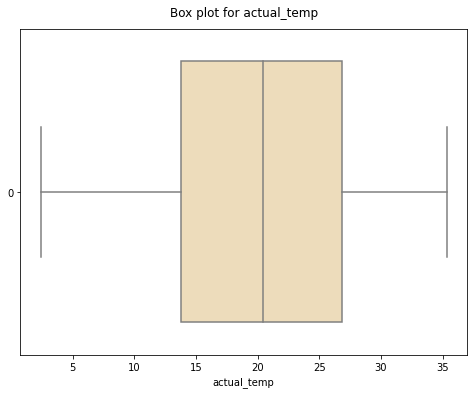

In [40]:
plt.figure(figsize=(8,6))
# Box plot
sns.boxplot(df["actual_temp"],orient="h",color='wheat') # orient="h" for horizontal or orient="v" for vertical

plt.title("Box plot for actual_temp",y=1.02)
plt.xlabel("actual_temp")
# plt.ylabel("")
plt.show()

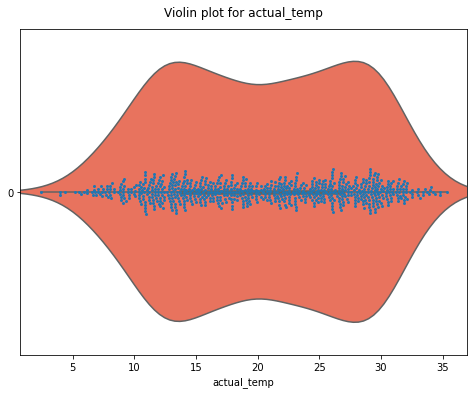

In [41]:
plt.figure(figsize=(8,6))
# Violin Plot
sns.violinplot(df["actual_temp"],orient="h",color="tomato") # refer color guide at bottom
sns.swarmplot( df["actual_temp"],size=3,orient="h")

plt.title("Violin plot for actual_temp",y=1.02)
plt.xlabel("actual_temp")
# plt.ylabel("")
plt.show()

In [ ]:
## Conclude and write down your observation.

**actual_temp** Column has a symmetrical distribution with skew -0.05 which is between -0.5 and 0.5 . 
- Density curve for actual_temp is multimodal and have two peaks.
- Range of actual_temp value is from minimum 2 deegre celcsius and maximum 35 deegre celusius.
- Most of the actual_temp are failling under two groups 10-18 and 25-30.

- 10% of actual_temp are 10.66 deegre celcsius and below.
- 25% of people are of age 13.82 deegre celcsius and below.
- 50% of people are of age 20.43 deegre celcsius and below.
- 75% of people are of age 26.87 deegre celcsius and below.
- 90% of people are of age 29.99 deegre celcsius and below.
- actual_temp column has no extreme values.

actual_temp column could be a good predictor for bike count and it's relation with other columns should be explored further.

## Do Categortical  Analysis of Columns

In [ ]:
#  Categorical column analysis 
#  You can learn about their count values and their percentage.
# value_counts allows you to find the number of each category in the that column.
#  Count plot.

# find no. of unique values and what are those unique values.

#  Word cloud to create most frequently occuring words.

In [ ]:
## Conclude and write down your observation.

## Combine Numerical and categorical columns for analysis

## Add your own Questions

# Data Cleaning

## 1. Handling Duplicate data

In [ ]:
## Check shape of original data

In [ ]:
## Check shape after applying drop duplicates.

In [ ]:
## Drop duplicate values and reset your index columns.

## 2.  Handling Missing Values

In [ ]:
## Apply isnull() function and find the sum of missing values in all columns.

In [ ]:
## Find missing value in % form.

In [ ]:
## Conclude your finding on missing values.

In [ ]:
## Drop the columns based on above analysis.

## 3. Handling Outliers 

In [ ]:
## Apply below techniques on numerical columns.

# Do box plot and violin plot to identify outliers.

# Q1 --> 25%ile of data 
#     first line of the box plot
# Q2 --> median or 50%ile of data
#     second line or middle line of the box.
# Q3 --> 75%ile of data   
#     third line or the last of the box.

# IQR --> Interquartile range.
#      distance/value between Q1 or 25%ile and Q3 or 75%ile
#     IQR = Q3-Q1
    
# minimum whisker --> Q1 - 1.5*IQR
# maximum whisker --> Q3 + 1.5*IQR

# Any value below mimimum whisker and above maximum whisker are termed as outlier.

In [ ]:
## Based on your anlysis either drop extreme values or substitute them with more acceptable value.

## 4. Handling Categoirical Values

## 5 . Handling Numerical values

# Model Building